In [1]:
import os.path
import pickle

In [2]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

## Use a local copy of TSNE

It's saved in ./t_sne.py

In [3]:
from t_sne import TSNE

## Load data

The data is saved in ```features_<idx>.pkl``` files

There is one pickle file per epoch of data and it contains a dict with the target values (```'t'```), the penultimate layer features (```'features'```) and the final layer classifications (```'classifications'```)

In [4]:
idx = 0
data = []
while os.path.exists('features_{:03}.pkl'.format(idx)):
    with open('features_{:03}.pkl'.format(idx), 'rb') as f:
        data.append(pickle.load(f))
    idx += 1
print('Loaded {} epochs worth of features'.format(idx))

Loaded 20 epochs worth of features


## Choose an epoch to embed and plot

In [5]:
epoch = len(data)-1 # use the latest one
target = data[epoch]['t']
features = data[epoch]['features']

## Compute the embedding

In [6]:
tsne = TSNE(n_components=2, verbose=2)
X_embedded=tsne.fit_transform(features)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.078s...
[t-SNE] Computed neighbors for 10000 samples in 26.271s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.905616
[t-SNE] Computed conditional probabilities in 0.305s
[t-SNE] Iteration 50: error = 94.7673416, gradient norm = 0.0193433 (50 iterations in 5.520s)
[t-SNE] I

## Plot embedding

In [7]:
def plot_embedding(X, target, title=None):
    cmap = mpl.cm.jet
    cmaplist = [cmap(i) for i in range(cmap.N)]
    cmap = mpl.colors.LinearSegmentedColormap.from_list('Custom cmap', cmaplist, N=10)

    fig, ax = plt.subplots(1, 1, figsize=(6,5), dpi=200)

    if title is not None:
        plt.title(title)

    target = data[0]['t']
    test_count = len(target)
    idx = range(0, test_count)
    cs=ax.scatter(X_embedded[idx,0], X_embedded[idx,1],
                   norm=mpl.colors.Normalize(vmin=-0.5, vmax=9.5),
                   s=.5, c=target[idx], cmap=cmap)

    cb = plt.colorbar(cs)
    cb.set_ticks(np.arange(0,10))
    cb.set_ticklabels(np.arange(0, 10))

    #ax[i].set_xticks([])
    #ax[i].set_yticks([])

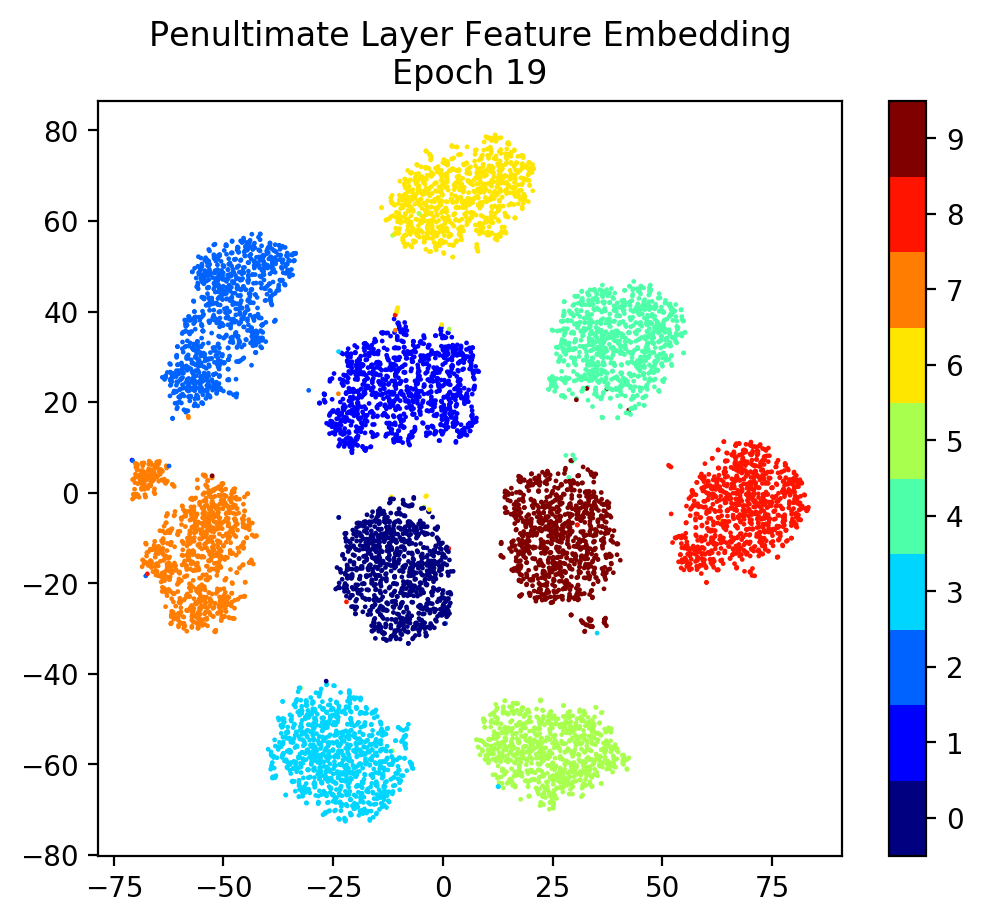

In [8]:
plot_embedding(X_embedded, target, 'Penultimate Layer Feature Embedding\nEpoch {}'.format(epoch))